In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import datasets
from sklearn.base import clone

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)
plt.style.use("fivethirtyeight")


## Parte 1
### Cargar los datos de la diabetes desde sklearn siguiendo las instrucciones del link. 
### Investigar qué significan los predictores.
### Elaborar un análisis exploratorio básico para comprobar si hay valores perdidos, y trazar las distribuciones univariantes y conjuntas de los predictores y el objetivo. 
### Es posible que se necesite hacer un cambio en los datos basado en la exploración.
### Utilizar visualizaciones para entender los datos.

In [2]:
diabetes= datasets.load_diabetes(as_frame=True)["frame"]
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


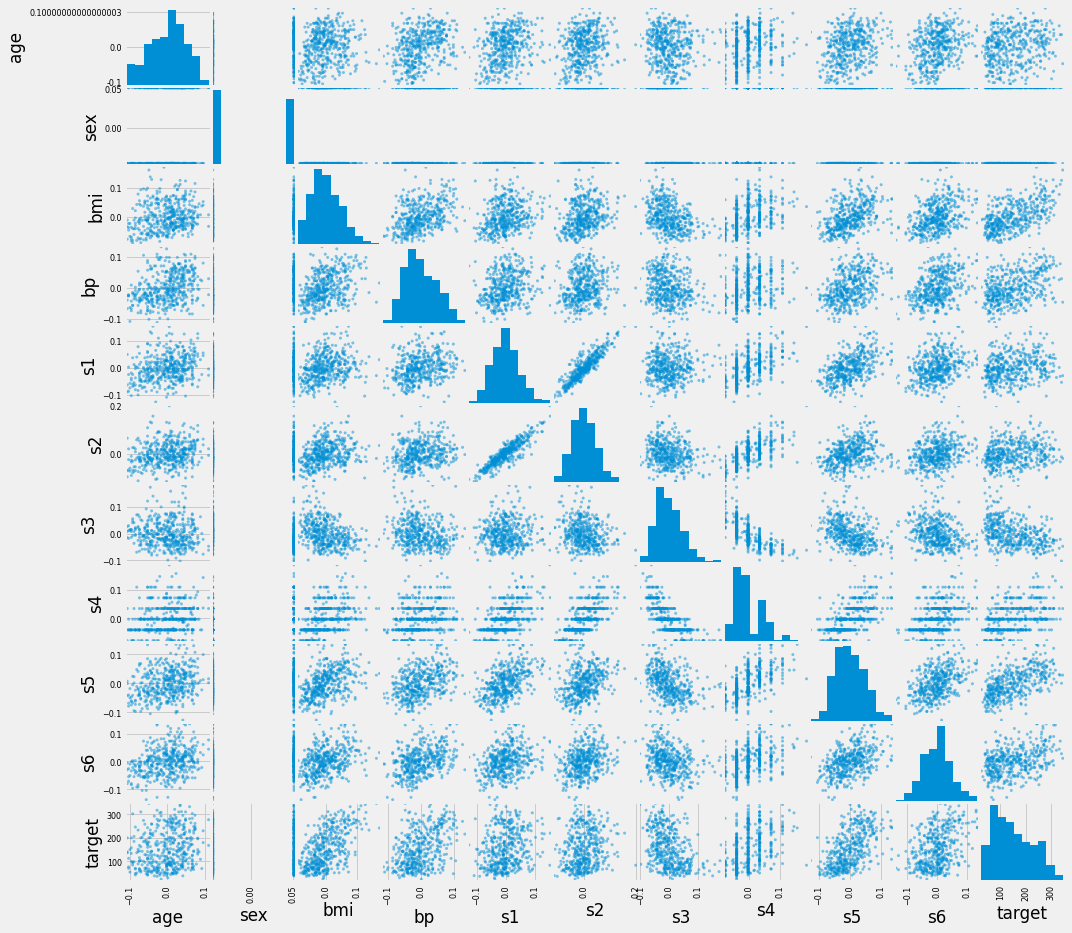

In [3]:
plot=pd.plotting.scatter_matrix(diabetes, alpha=0.5, figsize=(15,15));

(array([24., 23., 47., 53., 55., 85., 69., 47., 33.,  6.]),
 array([-0.10722563, -0.0854304 , -0.06363517, -0.04183994, -0.02004471,
         0.00175052,  0.02354575,  0.04534098,  0.06713621,  0.08893144,
         0.11072668]),
 <BarContainer object of 10 artists>)

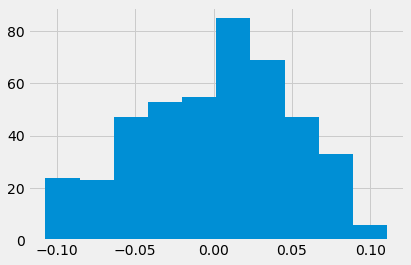

In [4]:
plt.hist(diabetes["age"])

(array([235.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.]),
 array([-0.04464164, -0.03510946, -0.02557729, -0.01604511, -0.00651293,
         0.00301924,  0.01255142,  0.02208359,  0.03161577,  0.04114794,
         0.05068012]),
 <BarContainer object of 10 artists>)

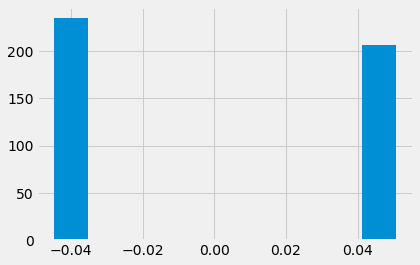

In [5]:
plt.hist(diabetes["sex"])

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-0.0902753 , -0.06419224, -0.03810919, -0.01202614,  0.01405691,
         0.04013997,  0.06622302,  0.09230607,  0.11838912,  0.14447217,
         0.17055523]),
 <BarContainer object of 10 artists>)

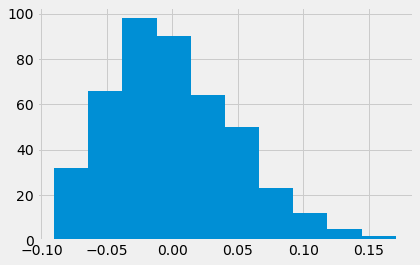

In [6]:
plt.hist(diabetes["bmi"])

(array([ 5., 30., 68., 90., 78., 58., 53., 37., 18.,  5.]),
 array([-0.1123996 , -0.08795522, -0.06351084, -0.03906646, -0.01462207,
         0.00982231,  0.03426669,  0.05871107,  0.08315545,  0.10759984,
         0.13204422]),
 <BarContainer object of 10 artists>)

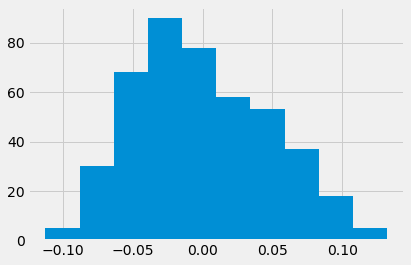

In [7]:
plt.hist(diabetes["bp"])

(array([  5.,  21.,  58.,  85., 113.,  80.,  43.,  24.,   7.,   6.]),
 array([-0.12678067, -0.09871123, -0.07064179, -0.04257235, -0.01450292,
         0.01356652,  0.04163596,  0.0697054 ,  0.09777484,  0.12584427,
         0.15391371]),
 <BarContainer object of 10 artists>)

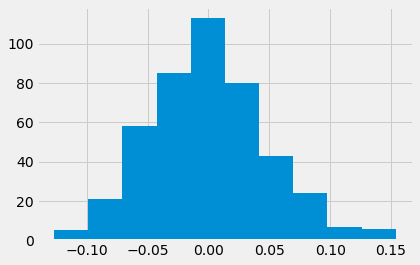

In [8]:
plt.hist(diabetes["s1"])

(array([ 12.,  44.,  96., 115.,  91.,  54.,  19.,   9.,   1.,   1.]),
 array([-0.11561307, -0.08417296, -0.05273285, -0.02129275,  0.01014736,
         0.04158746,  0.07302757,  0.10446767,  0.13590778,  0.16734788,
         0.19878799]),
 <BarContainer object of 10 artists>)

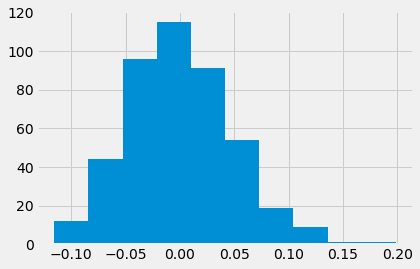

In [9]:
plt.hist(diabetes["s2"])

(array([ 10.,  56., 114.,  97.,  80.,  48.,  21.,   9.,   3.,   4.]),
 array([-0.10230705, -0.07395844, -0.04560983, -0.01726122,  0.01108739,
         0.039436  ,  0.06778462,  0.09613323,  0.12448184,  0.15283045,
         0.18117906]),
 <BarContainer object of 10 artists>)

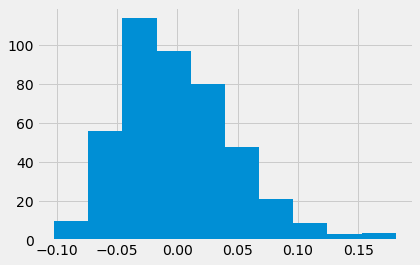

In [10]:
plt.hist(diabetes["s3"])

(array([ 33., 136., 121.,  16.,  76.,  37.,   4.,  14.,   4.,   1.]),
 array([-0.0763945 , -0.05023161, -0.02406871,  0.00209418,  0.02825708,
         0.05441997,  0.08058286,  0.10674576,  0.13290865,  0.15907155,
         0.18523444]),
 <BarContainer object of 10 artists>)

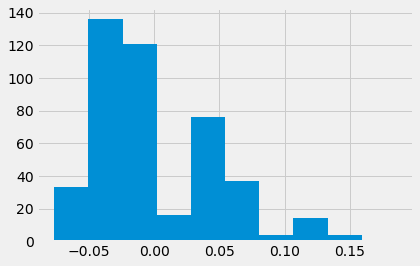

In [11]:
plt.hist(diabetes["s4"])

(array([ 3., 13., 54., 87., 88., 78., 62., 37., 12.,  8.]),
 array([-0.12609739, -0.10012775, -0.07415811, -0.04818848, -0.02221884,
         0.0037508 ,  0.02972043,  0.05569007,  0.08165971,  0.10762934,
         0.13359898]),
 <BarContainer object of 10 artists>)

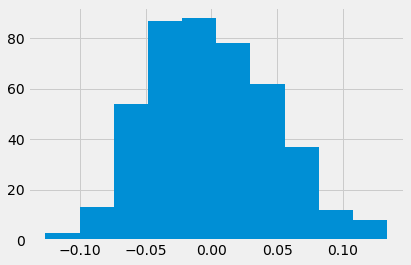

In [12]:
plt.hist(diabetes["s5"])

(array([  3.,  13.,  32.,  75.,  82., 119.,  63.,  30.,  17.,   8.]),
 array([-0.13776723, -0.11042932, -0.08309141, -0.05575351, -0.0284156 ,
        -0.0010777 ,  0.02626021,  0.05359811,  0.08093602,  0.10827393,
         0.13561183]),
 <BarContainer object of 10 artists>)

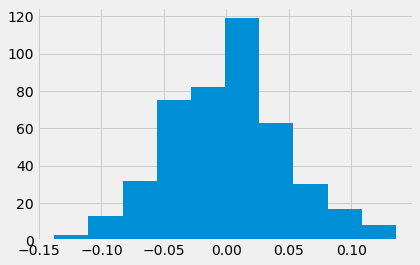

In [13]:
plt.hist(diabetes["s6"])

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

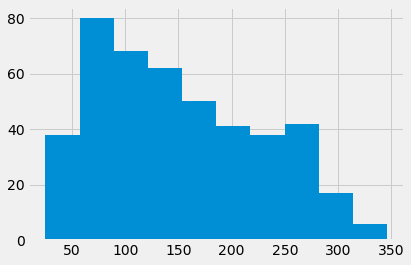

In [14]:
plt.hist(diabetes["target"])

In [15]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [16]:
diabetes.describe().T #Para mejor interpretación se pone la transpuest

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.639623e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.309912e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.013951e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.289818e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-9.042540e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.301121e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.563971e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.863174e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.848103e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.398488e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


# Parte 2
### La regularización Ridge es una forma de contracción: las estimaciones de los parámetros se reducen hacia cero en comparación con las estimaciones de una regresión no regularizada. La cantidad de regularización (es decir, la severidad de la contracción) se establece a través del parámetro alfa de Ridge, que necesita ser ajustado con validación cruzada.
### Dividir los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utilizará para ajustar y afinar todos los modelos, y el conjunto de pruebas se utilizará al final para comparar los modelos finales.
### Ajustar una regresión Ridge con alfa = 0,5 al conjunto de datos de entrenamiento. 
### Utilizar el modelo ajustado para generar predicciones en el conjunto de datos de prueba.
### Calcular el MSE del modelo ajustado en el conjunto de prueba.
### Estimar el error de prueba y de entrenamiento de la regresión Ridge utilizando una validación cruzada 10 veces. 
### Ejemplo:
### kf = KFold(n_splits=n_folds, random_state=random_seed)
### test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
### for idx, (train, test) in enumerate(kf.split(X_train)):
#### Dividir en conjuntos de entrenamiento y prueba
#### Fit regresión Ridge con los datos de entrenamiento
#### Elaborar predicciones
#### Calcular MSE
#### Almacenar MSE como un array
### Convertir el código de validación cruzada en una función
#### def cv(X, y, base_estimator, n_folds, random_seed=154):
#### Returns:
####  train_cv_errors, test_cv_errors: tuple of arrays
### De manera que se pueda llamar como en el siguiente ejemplo:
#### train_cv_errors, test_cv_errors = cv(X_train, y_train, Ridge(alpha=0.5), n_folds=10)
### ** Hacer un clon del modelo dentro de la función antes de ajustarlo.
#### from sklearn.base import clone
#### estimator = clone(base_estimator)
### Elaborar una función para cambiar el valor de alfa iniciando en cero.
#### def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
#### Returns
#### cv_errors_train, cv_errors_test: tuple of DataFrame
#### cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
####                                      columns=alphas)
#### cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
####                                         columns=alphas)
#### for alpha in alphas:
#### return cv_errors_train, cv_errors_test
### Calcular los errores de entrenamiento y de prueba para cada valor de alfa utilizando una validación cruzada 10 veces.
### De manera que se pueda llamar con:
#### train_at_various_alphas(X_train, y_train, Ridge, ridge_alphas)
###  Promediar las diez estimaciones de error de entrenamiento y prueba para cada alfa con el objetivo de obtener una estimación más estable del error de entrenamiento y prueba para cada valor del parámetro de regularización. 
###  Elaborar las curvas de MSE promedio de entrenamiento y prueba a medida que varía alfa (Probar “log(\alpha)” en el eje X para mejorar la visualización).
###  Calcular el valor de alfa que produce al mínimo error de prueba del CV, y superponer una línea vertical en el valor óptimo de alfa en el gráfico de las curvas MSE.
###  Ajustar una secuencia de modelos de regresión Ridge a los datos de entrenamiento para la misma secuencia de alfa que la anterior
###  Graficar las trayectorias de los coeficientes como una función de log(alfa) y superponer una línea vertical en el valor óptimo de alfa elegido por la validación cruzada.


In [17]:
y=diabetes["target"]
X=diabetes.drop(["target"], axis=1)

In [18]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=40)

In [19]:
rg=Ridge(alpha=0.5)
rg.fit(X_train, y_train)
y_pred=rg.predict(X_test)
y_pred

array([110.05188391, 169.38726463, 180.18105206, 185.03247077,
       161.91361891, 210.56959707, 154.38691172, 111.17385345,
       161.64746999, 135.25542908, 168.27476078, 118.56594687,
        76.14472038, 169.89704295,  83.75599977, 163.14213631,
       141.77068967, 134.88079309,  96.6435275 , 137.58284736,
        88.74401509, 215.15316724, 136.95258401, 129.43704544,
        91.51924386, 168.08161955, 144.21912424, 116.57766622,
       179.11034673,  92.84340691, 152.91528709, 153.16490225,
       128.72152524, 166.40104066,  98.90357105,  80.27345222,
       121.66195652, 101.20031669, 195.97981626, 143.92057455,
       149.6925968 ,  91.84273284, 156.28562883, 157.75494222,
       197.34786556, 140.25053396, 107.48425058, 156.42739204,
       124.14326315, 227.33238695, 198.98111415, 169.18201848,
       207.25296583, 198.98477225, 146.13294939, 181.82601784,
       135.20003142, 143.02155028, 125.77618021, 156.28836289,
       162.78134035,  77.71193328, 186.23160926, 179.95

In [20]:
y_mse=mean_squared_error(y_test, y_pred)
y_mse

3655.045787392184

In [21]:
r2= r2_score(y_test, y_pred)
r2

0.4072010484349502

In [22]:
n_folds=5
random_seed=0
kf=KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
test_cv_errors, train_cv_errors= np.empty(n_folds), np.empty(n_folds)

X_train2=np.array(X_train)
y_train2=np.array(y_train)

for j, (t_index, v_index) in enumerate(kf.split(X_train2)):
    X_tr= X_train2[t_index]
    y_tr= y_train2[t_index]
    X_v=X_train2[v_index]
    y_v=y_train2[v_index]
    
    rg=Ridge(alpha=0.5)
    rg.fit(X_tr, y_tr)
    
    #Train
    y_tr_pred=rg.predict(X_tr)
    mse1=mean_squared_error(y_tr, y_tr_pred)
    train_cv_errors[j]=mse1
    
    #Test
    y_v_pred=rg.predict(X_v)
    mse2=mean_squared_error(y_v, y_v_pred)
    test_cv_errors[j]=mse2

In [23]:
train_cv_errors, test_cv_errors

(array([2966.49090389, 2911.85109045, 3004.54407349, 2760.9208334 ,
        3064.54651289]),
 array([3214.0775263 , 3220.25505986, 2591.88178737, 3737.0190202 ,
        2471.10292047]))

In [24]:
def cv(X, y, estimator, folds, seed=154):
    """
    PArameters
    -----------
    X: np.array
        Matrix of predictors.
    y: np.array
        Target array.
    estimator: sklearn model object,
        The estimator to fit. Must have fit and predict methods.
    folds: int
        The number of folds in the cross validation.
    seed: int
        A seed for the random number generator, for repeatability.
    Returns
    --------
    train_cv_errors, test_cv_errors: tuple of arrays
    The training and testing errors for each fold of cross validation.
    """
    X_train, X_test, y_train, y_test, = train_test_split(X, y, shuffle=True, test_size=0.33, random_state=40)
    
    kf=KFold(n_splits=folds)
    test_cv_errors, train_cv_errors= np.empty(folds), np.empty(folds)
    
    for j, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_tr= X_train[train_index]
        y_tr= y_train[train_index]
        X_vl=X_train[val_index]
        y_vl=y_train[val_index]

        estimator.fit(X_tr, y_tr)


        #Train
        y_tr_pred=estimator.predict(X_tr)
        mse2=mean_squared_error(y_tr, y_tr_pred)
        train_cv_errors[j]=mse2

        #Test
        y_test_pred=estimator.predict(X_vl)
        mse3=mean_squared_error(y_vl, y_test_pred)
        test_cv_errors[j]=mse3
        
    return train_cv_errors, test_cv_errors

In [25]:
train_cv_errors, test_cv_errors=cv(np.array(X_train), np.array(y_train), Ridge(alpha=0.5), folds=10)
train_cv_errors,test_cv_errors

(array([2762.78484219, 2638.5171579 , 2619.03091235, 2634.44751753,
        2832.73662533, 2706.97377754, 2821.47293701, 2791.70119704,
        2896.7870634 , 2834.30570169]),
 array([2992.24435481, 4134.43507727, 4372.79849341, 3768.86065614,
        2116.09575636, 3016.68704486, 2791.27902675, 1974.06589055,
        1676.23736009, 2305.65399461]))

In [26]:
cv.__doc__

'\n    PArameters\n    -----------\n    X: np.array\n        Matrix of predictors.\n    y: np.array\n        Target array.\n    estimator: sklearn model object,\n        The estimator to fit. Must have fit and predict methods.\n    folds: int\n        The number of folds in the cross validation.\n    seed: int\n        A seed for the random number generator, for repeatability.\n    Returns\n    --------\n    train_cv_errors, test_cv_errors: tuple of arrays\n    The training and testing errors for each fold of cross validation.\n    '

## Regresión Ridge

In [27]:
from sklearn.base import clone

In [28]:
def cv(X, y, estimator, folds, seed=154):
    """
    Parameters
    -----------
    X: np.array
        Matrix of predictors.
    y: np.array
        Target array.
    estimator: sklearn model object,
        The estimator to fit. Must have fit and predict methods.
    folds: int
        The number of folds in the cross validation.
    seed: int
        A seed for the random number generator, for repeatability.
    Returns
    --------
    train_cv_errors, test_cv_errors: tuple of arrays
    The training and testing errors for each fold of cross validation
    
    """
    X_train, X_test, y_train, y_test, = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=40)
    
    kf=KFold(n_splits=folds)
    test_cv_errors, train_cv_errors= np.empty(folds), np.empty(folds)   
   
    for j, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_tr= X_train[train_index]
        y_tr= y_train[train_index]
        X_vl=X_train[val_index]
        y_vl=y_train[val_index]

        estimator1=clone(estimator)
        estimator1.fit(X_tr, y_tr)


        #Train
        y_tr_pred=estimator1.predict(X_tr)
        mse2=mean_squared_error(y_tr, y_tr_pred)
        train_cv_errors[j]=mse2

        #Test
        y_test_pred=estimator1.predict(X_vl)
        mse3=mean_squared_error(y_vl, y_test_pred)
        test_cv_errors[j]=mse3
        
    return train_cv_errors, test_cv_errors

In [29]:
cv.__doc__

'\n    Parameters\n    -----------\n    X: np.array\n        Matrix of predictors.\n    y: np.array\n        Target array.\n    estimator: sklearn model object,\n        The estimator to fit. Must have fit and predict methods.\n    folds: int\n        The number of folds in the cross validation.\n    seed: int\n        A seed for the random number generator, for repeatability.\n    Returns\n    --------\n    train_cv_errors, test_cv_errors: tuple of arrays\n    The training and testing errors for each fold of cross validation\n    \n    '

In [30]:
train_cv_errors, test_cv_errors=cv(np.array(X_train), np.array(y_train), Ridge(alpha=0.5), folds=10)
print(train_cv_errors.mean(),test_cv_errors.mean())

2680.0922524114903 2781.4172336864567


In [31]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **akwargs):
    
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                   columns=alphas)
    cv_errors_test=pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                   columns=alphas)
    for alpha in alphas:
        cv_errors_train[alpha], cv_errors_test[alpha] = cv(X, y, model(alpha), n_folds)
        
    return cv_errors_train,cv_errors_test
                                   

In [32]:
ridge_alphas=np.logspace(-2,4, num=250)
ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(
    np.array(X_train), np.array(y_train), Ridge, ridge_alphas)
ridge_cv_errors_train, ridge_cv_errors_test

(   0.010000      0.010571      0.011174      0.011811      0.012485      \
 0   2272.975771   2273.219654   2273.482935   2273.767183   2274.074091   
 1   2197.975501   2198.171213   2198.380859   2198.605700   2198.847120   
 2   1923.150617   1923.651899   1924.162747   1924.684042   1925.216843   
 3   1970.385130   1970.546749   1970.722303   1970.913194   1971.120966   
 4   2219.377052   2219.592750   2219.823604   2220.070923   2220.336139   
 5   2132.439603   2132.657459   2132.890631   2133.140448   2133.408369   
 6   2209.281174   2209.664898   2210.069816   2210.497464   2210.949505   
 7   2151.386337   2151.684204   2152.000561   2152.336889   2152.694805   
 8   2282.859104   2283.053443   2283.263533   2283.490839   2283.736961   
 9   2247.636503   2247.868243   2248.115901   2248.380817   2248.664458   
 
    0.013197      0.013950      0.014746      0.015587      0.016477      ...  \
 0   2274.405482   2274.763318   2275.149716   2275.566956   2276.017494  ...   


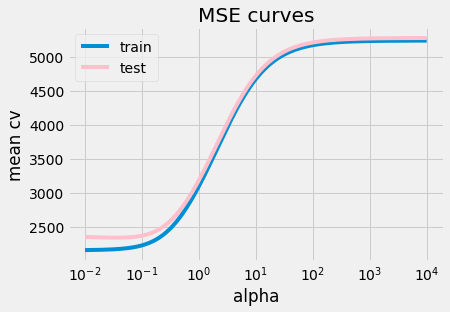

In [33]:
ridge_cv_errors_train.mean(), ridge_cv_errors_test.mean()

fig, ax=plt.subplots()
ax.semilogx(ridge_alphas, ridge_cv_errors_train.mean(), label='train')
ax.semilogx(ridge_alphas, ridge_cv_errors_test.mean(), label='test', color='pink')
ax.set_xlabel('alpha')
ax.set_ylabel('mean cv')
ax.set_title('MSE curves')
ax.legend();

In [34]:
ridge_cv_errors_test_min=ridge_cv_errors_test.mean()[ridge_cv_errors_test.mean()==ridge_cv_errors_test.mean().min()]
optimal_alpha=ridge_cv_errors_test_min.index

In [35]:
optimal_alpha

Float64Index([0.03582752992908634], dtype='float64')

In [36]:
ridge_cv_errors_test_min

0.035828    2343.100449
dtype: float64

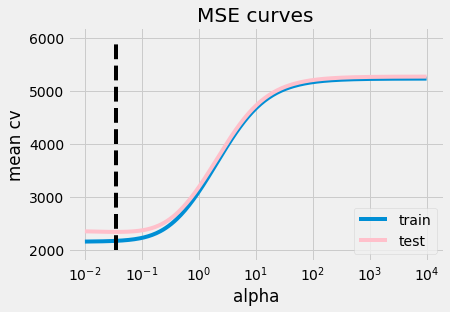

In [37]:
fig, ax=plt.subplots()
ax.semilogx(ridge_alphas, ridge_cv_errors_train.mean(), label='train')
ax.semilogx(ridge_alphas, ridge_cv_errors_test.mean(), label='test', color='pink')

ax.plot([optimal_alpha,optimal_alpha],[2000,6000], color= 'black', linestyle='dashed')

ax.set_xlabel('alpha')
ax.set_ylabel('mean cv')
ax.set_title('MSE curves')
ax.legend();

In [54]:
X_train.shape

(309, 10)

In [40]:
def get_ridge_coeff(X, y, alphas):
    nalphas= len(alphas)
    nfeatures=X.shape[1]
    coefs=np.zeros((nalphas,nfeatures))
    
    for i, alpha in enumerate(alphas):
        #Fit
        model=Ridge(alpha=alpha).fit(X,y)
        #grt coefficients
        coefs[i]=model.coef_
        
    return coefs

In [55]:
coefs_ridge=get_ridge_coeff(X_train, y_train, ridge_alphas)
coefs_ridge

array([[ 1.83848407e+01, -2.21455523e+02,  5.77954468e+02, ...,
         1.18707533e+02,  5.98695129e+02,  3.67966892e+01],
       [ 1.84724958e+01, -2.21149070e+02,  5.77566348e+02, ...,
         1.18075657e+02,  5.95210964e+02,  3.69828993e+01],
       [ 1.85623367e+01, -2.20831817e+02,  5.77151312e+02, ...,
         1.17469203e+02,  5.91758320e+02,  3.71777272e+01],
       ...,
       [ 2.72511864e-02,  6.50183589e-03,  7.31088923e-02, ...,
         5.07395683e-02,  7.02592783e-02,  4.50712981e-02],
       [ 2.57808686e-02,  6.15127498e-03,  6.91637733e-02, ...,
         4.80018821e-02,  6.64680304e-02,  4.26394236e-02],
       [ 2.43898550e-02,  5.81959687e-03,  6.54315023e-02, ...,
         4.54118650e-02,  6.28813182e-02,  4.03387255e-02]])

In [56]:
coefs_ridge.shape

(250, 10)

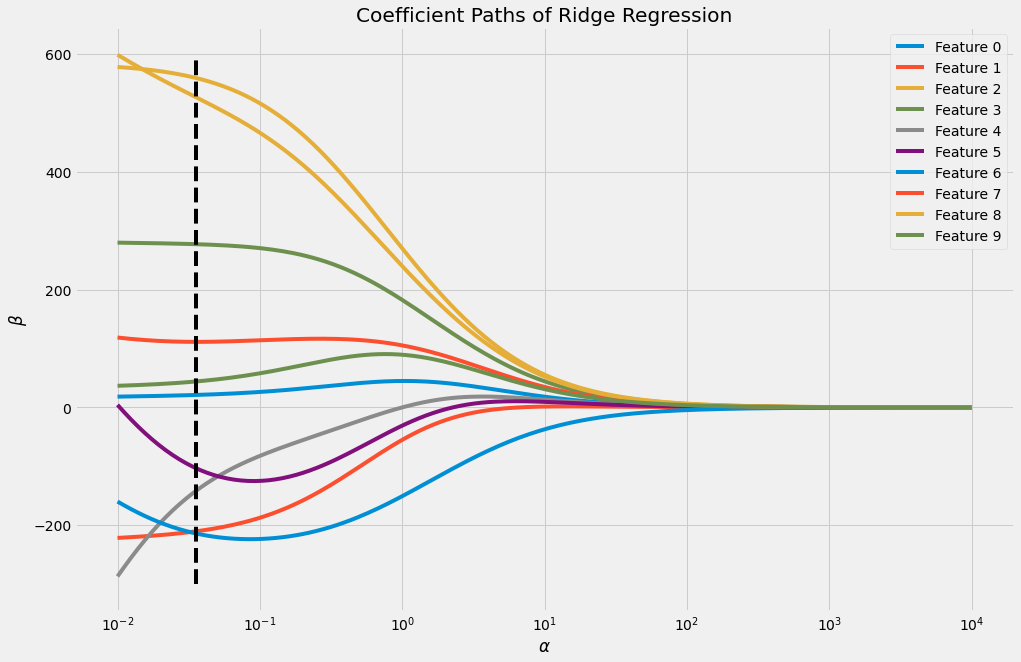

In [57]:
fig,ax=plt.subplots(figsize=(15,10))

i=0
while i<10:
    ax.semilogx(ridge_alphas,coefs_ridge[:,i], label='Feature {}' .format(i))
    i+=1

ax.plot([optimal_alpha,optimal_alpha],[-300,600], color= 'black', linestyle='dashed')
ax.set_title('Coefficient Paths of Ridge Regression')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right');

## Parte 3 LASSO
### La regresión LASSO es útil para imponer la dispersión en los coeficientes. Es decir, es preferible si creemos que muchas de las características no son en absoluto relevantes para predecir el objetivo.
### Repetir los pasos anteriores pero esta vez utilizando la clase Lasso de sklearn. 
### Es necesario utilizar una secuencia diferente de valores alfa para obtener buenos resultados.


In [58]:
lasso_alphas=np.logspace(-10,10, num=500)
lasso_cv_errors_train, lasso_cv_errors_test= train_at_various_alphas(
    np.array(X_train), np.array(y_train), Lasso, lasso_alphas)

In [59]:
lasso_cv_errors_test_min=lasso_cv_errors_test.mean()[lasso_cv_errors_test.mean()==lasso_cv_errors_test.mean().min()]
lasso_optimal_alpha=lasso_cv_errors_test_min.index

In [60]:
lasso_optimal_alpha

Float64Index([0.049818975192051654], dtype='float64')

In [61]:
lasso_cv_errors_test_min

0.049819    2324.725244
dtype: float64

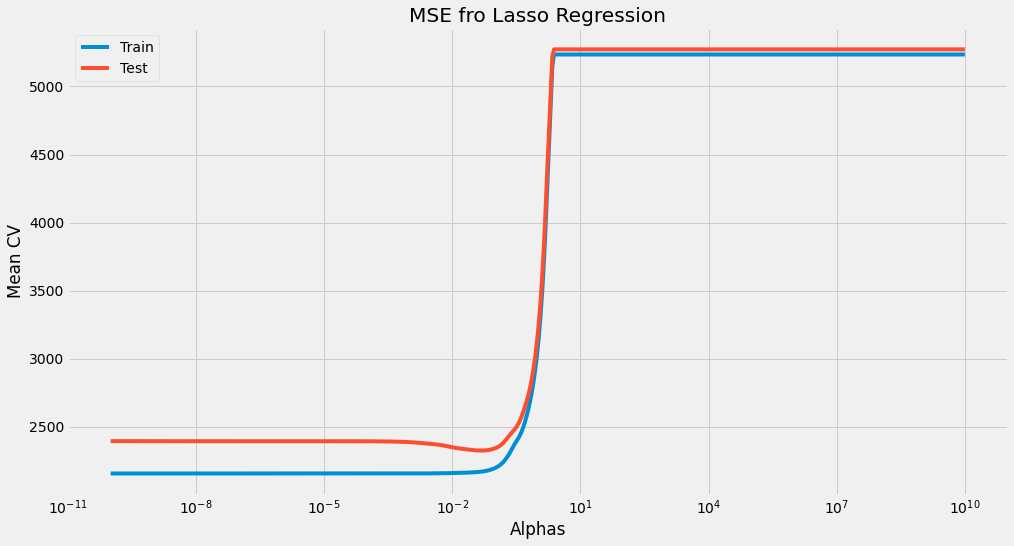

In [63]:

fig, ax=plt.subplots(figsize=(15,8))

ax.semilogx(lasso_alphas, lasso_cv_errors_train.mean(), label="Train")
ax.semilogx(lasso_alphas, lasso_cv_errors_test.mean(), label="Test")

ax.set_xlabel("Alphas")
ax.set_ylabel("Mean CV")
ax.set_title("MSE fro Lasso Regression")
#ax.plot([optimal_alpha,optimal_alpha],[-300,600], color= 'black', linestyle='dashed')

ax.legend()

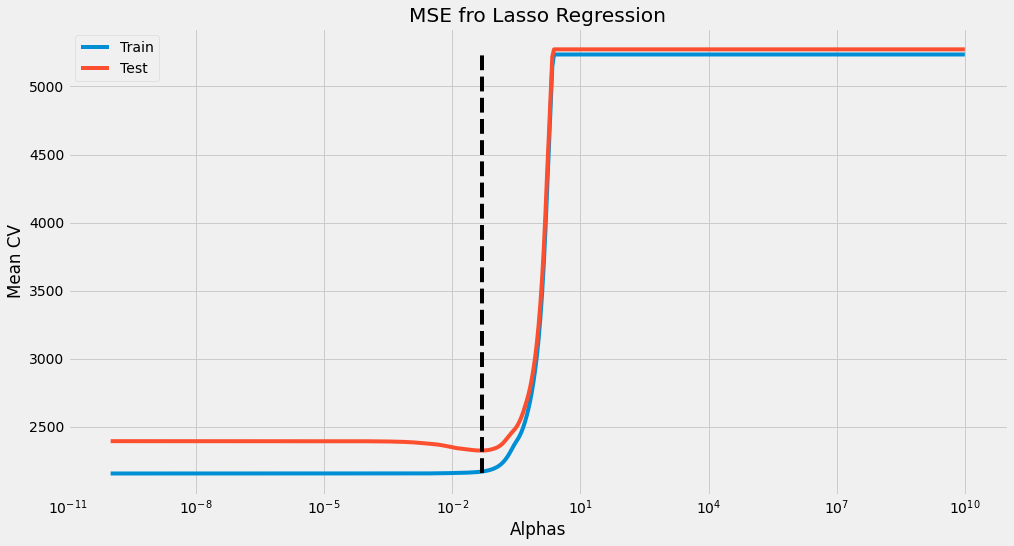

In [64]:
fig, ax=plt.subplots(figsize=(15,8))

ax.semilogx(lasso_alphas, lasso_cv_errors_train.mean(), label="Train")
ax.semilogx(lasso_alphas, lasso_cv_errors_test.mean(), label="Test")

ax.set_xlabel("Alphas")
ax.set_ylabel("Mean CV")
ax.set_title("MSE fro Lasso Regression")

ax.plot([lasso_optimal_alpha, lasso_optimal_alpha], [lasso_cv_errors_train.mean().min(),lasso_cv_errors_train.mean().max()], color='black', linestyle='dashed')

ax.legend()

In [65]:
def get_ridge_lasso_coeff(X, y, alphas, regression=Lasso):
    nalphas= len(alphas)
    nfeatures=X.shape[1]
    coefs=np.zeros((nalphas,nfeatures))
    
    for i, alpha in enumerate(alphas):
        #Fit
        model=Ridge(alpha=alpha).fit(X,y)
        #grt coefficients
        coefs[i]=model.coef_
        
    return coefs

In [66]:
coefs_lasso=get_ridge_lasso_coeff(X_train, y_train, alphas=lasso_alphas, regression=Lasso)
coefs_lasso

array([[ 1.55495845e+01, -2.29936373e+02,  5.82199872e+02, ...,
         1.60240095e+02,  7.68486334e+02,  3.27749043e+01],
       [ 1.55495846e+01, -2.29936373e+02,  5.82199872e+02, ...,
         1.60240095e+02,  7.68486334e+02,  3.27749043e+01],
       [ 1.55495846e+01, -2.29936373e+02,  5.82199872e+02, ...,
         1.60240095e+02,  7.68486333e+02,  3.27749043e+01],
       ...,
       [ 2.93434246e-08,  7.00610052e-09,  7.87096212e-08, ...,
         5.46336728e-08,  7.56438027e-08,  4.85298867e-08],
       [ 2.67565822e-08,  6.38846035e-09,  7.17707794e-08, ...,
         4.98173059e-08,  6.89752356e-08,  4.42516142e-08],
       [ 2.43977893e-08,  5.82526978e-09,  6.54436483e-08, ...,
         4.54255377e-08,  6.28945527e-08,  4.03505034e-08]])

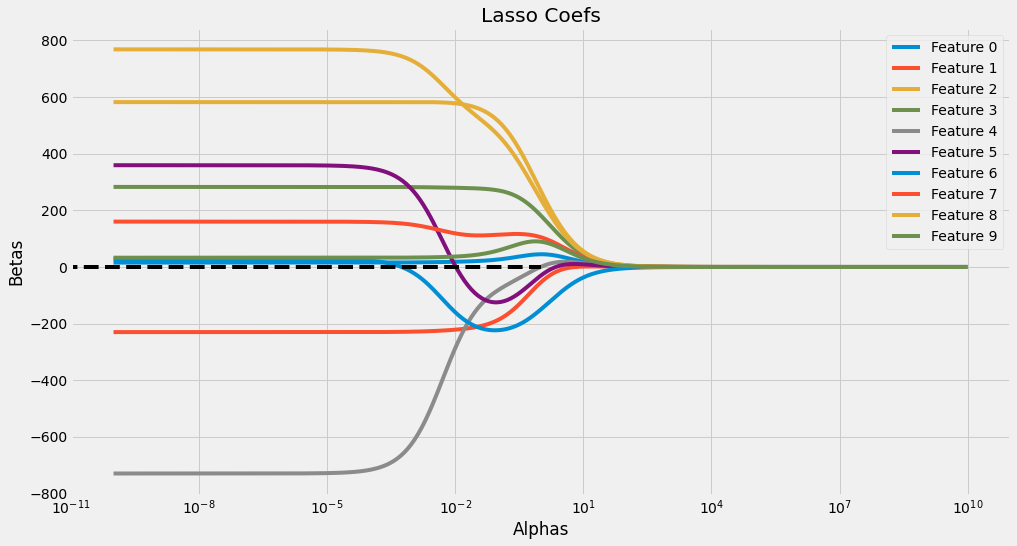

In [68]:
fig, ax=plt.subplots(figsize=(15,8))
i=0

while i<10:
    ax.semilogx(lasso_alphas, coefs_lasso[:,i], label='Feature {}' .format(i))
    i+=1

ax.plot([lasso_optimal_alpha, lasso_optimal_alpha], color="black",linestyle="dashed")
ax.set_title("Lasso Coefs")
ax.set_xlabel("Alphas")
ax.set_ylabel("Betas")

ax.legend()

# Parte 4: Comparación
### Ajustar una regresión Ridge y una regresión LASSO a su conjunto de entrenamiento utilizando los valores de alfa óptimos. 
### Calcular el MSE de estos modelos utilizando la validación de prueba (esta debería ser la primera vez que se utilizan los datos de prueba).
### Para comparar, ajuste también una regresión lineal no regularizada en los datos de entrenamiento y calcule su MSE en el conjunto de prueba.
### ¿Qué modelo elegiría? 
### ¿Qué pasos seguiría antes de ponerlo en producción?
